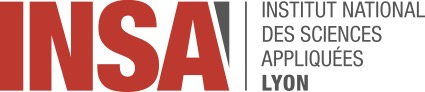
# P2I7: Chapitre 6 méthodes numériques
## La méthode des différences finies (1D)
Camille Carvalho (INSA/ICJ)

In [16]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

## Section 6.8 Exercice : Application en mécanique des fluides


Un fluide Newtonien s'écoule entre deux cylindres
concentriques. Ces deux cylindres pivotent autour de leurs
axes à des vitesses différentes (constantes). On cherche à
connaître la distribution des vitesses tangentielles du fluide,
selon le rayon r, qui doit satisfaire :
$$ \frac{d^2 v}{dr^2} + \frac{d}{dr}\left(\frac{v}{r}\right) = 0, $$
avec les conditions aux limites suivantes (le fluide adhère à
la paroi : il a la même vitesse) :
$$ v(r_1) = r_1\omega_1, ~~~~ v(r_2) = r_2\omega_2. $$

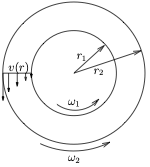
On se donne les valeurs : $r_1 = 3\mbox{cm}$, $r_2 = 10\mbox{cm}$, $\omega_1 = 2\pi \mbox{rad/s}$, et $\omega_2 = 4\pi \mbox{rad/s}$.

**Question 1.** Résoudre ce problème en l'approchant par différences finies et tracer le profil de vitesse selon $r$.

In [17]:
def solve_system(r1, r2, ω1, ω2, N):
    '''
    function that solves a linear system AV = F 
    coming from the equation d2v/dr2 + d/dr(v/r) = 0, v(0) = r1ω1, v(N) = r2ω2
    discretized using finites differences (second order scheme)
    
    Parameters
    ==========
    r1: float number, lower bound interval
    r2: float number, upper bound interval
    ω1: float number, boundary condition parameter 
    ω2: float number, boundary condition parameter
    N: integer, number of subintervals
    
    Returns
    =======
    The step size dr, as a float
    The sampled interval r, as an array of values
    The solution V, as an array of values
    '''
    # Construction vecteur x
    r = np.linspace(r1, r2, N)
    dr = (r2-r1)/(N-1)
    #On résoud un système linéaire de la forme Av = F
    A = np.zeros((N,N))
    F = np.zeros((N,1))
    #création des termes de la matrice A
    for i in range (1, N-1): #rappel cette boucle va de 1 à N-2 inclus (N-1 exclus)
        A[i,i]=-2/dr**2-1/r[i]**2;
        A[i,i-1]=1/dr**2-1/(2*dr)/r[i];
        A[i,i+1]=1/dr**2+1/(2*dr)/r[i];
    # Conditions aux limites
    # application des conditions de Dirichlet (attention commence à zero)
    A[0,0] = 1.0
    F[0] = r1*ω1
    A[N-1,N-1] = 1.0
    F[N-1] = r2*ω2
    # resolution
    V = np.linalg.solve(A,F)
    return dr, r, V

Text(0.5, 1.0, 'Vitesses tangentielles en fonction du rayon')

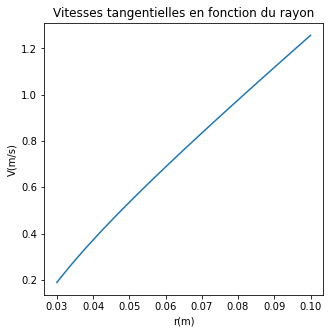

In [18]:
## Initialisation des variables
r1 = 3e-2
r2 = 10e-2
ω1 = 2*np.pi
ω2 = 4*np.pi
N = 100

dr, r, V = solve_system(r1, r2, ω1, ω2, N)
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.plot(r, V, label='V')
ax.set_xlabel('r(m)')
ax.set_ylabel('V(m/s)')
ax.set_title('Vitesses tangentielles en fonction du rayon')

In [19]:
# Pour aller plus loin
# On trace le résultat en fonction de la discrétisation 
from ipywidgets import interact

@interact
def interact_plot(N:(2, 202, 10) = 10):
    dr, r, V = solve_system(r1, r2, ω1, ω2, N)
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.plot(r, V, '--x', label='V')
    ax.set_xlabel('r(m)')
    ax.set_ylabel('V(m/s)')
    ax.set_title(f'Vitesses tangentielles pour Δr = {dr}')

interactive(children=(IntSlider(value=10, description='N', max=202, min=2, step=10), Output()), _dom_classes=(…

**Question 2.** Évaluer *précisément* la dérivée de $v$ en $r_1$ et la comparer avec la solution exacte $$\frac{dv}{dr}(r_1) = \frac{2\omega_2 r_2^2 - \omega_1(r_1^2 + r_2^2)}{r_2^2 - r_1^2}.$$

In [20]:
## Derivee de v en r1
dvdr_exacte=(2*ω2*r2**2-ω1*(r1**2+r2**2))/(r2**2-r1**2)
dvdr_calculee=(4*V[1]-V[2]-3*V[0])/(2*dr) #On utilise l'approche avec les noeuds internes
dvdr_ordre1=(V[1]-V[0])/(dr)
## erreur relative
err=np.abs((dvdr_calculee-dvdr_exacte)/dvdr_exacte)
err1=np.abs((dvdr_ordre1-dvdr_exacte)/dvdr_exacte)
print('Erreur relative = ',err)
print('Erreur relative ordre 1 = ',err1)

Erreur relative =  [0.0003994]
Erreur relative ordre 1 =  [0.00795358]


**Question 3.** Évaluer l'erreur relative sur cette dérivée pour plusieurs valeurs de $\Delta r$. Quelle valeur de $\Delta r$ est-elle nécessaire pour obtenir une erreur relative de $10^{-2}$ puis de $10^{-4}$ ? Comment évolue l'erreur relative ? Était-ce prévisible ?

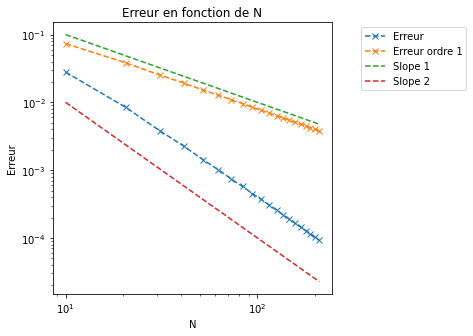

In [22]:
NN = np.linspace(10, 210, 20)
Error = np.zeros(len(NN))
Error1 = np.zeros(len(NN))
for idx, m in enumerate(NN):  
    N = int(m)
    dr, r, V = solve_system(r1, r2, ω1, ω2, N)
    dvdr_calculee=(4*V[1]-V[2]-3*V[0])/(2*dr)
    dvdr_ordre1=(V[1]-V[0])/(dr)
    Error[idx] = np.abs((dvdr_calculee-dvdr_exacte)/dvdr_exacte)
    Error1[idx] = np.abs((dvdr_ordre1-dvdr_exacte)/dvdr_exacte)

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.loglog(NN, Error, '--x', label='Erreur')
ax.loglog(NN, Error1, '--x', label='Erreur ordre 1')
ax.loglog(NN, 1/NN, '--', label='Slope 1')
ax.loglog(NN, (1/NN)**2, '--', label='Slope 2')
ax.set_xlabel('N')
ax.set_ylabel('Erreur')
ax.set_title(f'Erreur en fonction de N')
ax.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1))

On retrouve bien que la méthode est d'ordre 2

**Question 4.** Étudier l'intérêt de prendre une approximation ou non du second ordre pour le terme $\frac{d}{dr}\left(\frac{v}{r}\right)$. 

In [ ]:
#A vous de modifier le code précédent !